# EXAMEN PARCIAL

In [1]:
pip install pyshp

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install DBF

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install dbfread

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
import re
import shapefile as shp
import seaborn as sns
from scipy import stats

In [5]:
os.chdir("C:\Python PUCP\PARCIAL")

In [6]:
data_POS=pd.read_csv('positivos_covid.csv',encoding = 'UTF-8',delimiter = ';')
data_POS.head()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,20200329.0
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,20200330.0
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,20200330.0
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,20200330.0
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,20200330.0


In [7]:
data_POS.shape

(1048575, 9)

In [8]:
data_POS["METODODX"].value_counts()

PR    915538
AG    133037
Name: METODODX, dtype: int64

In [9]:
vacunas=pd.read_csv('vacunas_covid.csv',encoding = 'UTF-8')
vacunas.tail()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
3278066,20210524,f028643b46fcf3a7e1c6721089c1934d,PERSONAL DE SALUD,21.0,FEMENINO,20210519,1,PFIZER,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA
3278067,20210524,58b6485341c47939d86670317b87eabc,ESTUDIANTES DE CIENCIAS DE LA SALUD,22.0,FEMENINO,20210514,1,PFIZER,ANCASH,ANCASH,HUARAZ,HUARAZ
3278068,20210524,407110f7d1211014d92244faf48270b2,PERSONAL DE SALUD,18.0,FEMENINO,20210409,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,JESUS MARIA
3278069,20210524,407110f7d1211014d92244faf48270b2,PERSONAL DE SALUD,18.0,FEMENINO,20210501,2,SINOPHARM,LIMA CENTRO,LIMA,LIMA,JESUS MARIA
3278070,20210524,b9fab8488d9a5edc617f0f57da2831d0,PERSONAL DE SALUD,28.0,FEMENINO,20210330,1,SINOPHARM,LIMA SUR,LIMA,LIMA,CHORRILLOS


In [10]:
vacunas.shape

(3278071, 12)

In [11]:
poblacion=pd.read_csv('PoblacionREDATAM.csv', encoding= 'latin1',delimiter = ';')
poblacion.tail(2)

,Código,Código.1,POBLACION,Departamento,Provincia,Distrito,Edad 0,Edad 1 año,Edad 2 años,Edad 3 años,...,Edad 106 años,Edad 107 años,Edad 108 años,Edad 109 años,Edad 110 años,Edad 111 años,Edad 112 años,Edad 113 años,Edad 114 años,Edad 115 años
1872,250305,250305,5137,Ucayali,Padre Abad,Alexander Von Humboldt,105.0,103.0,110.0,124.0,...,0,0,0,0,0,0,0,0,0,0
1873,250401,250401,2860,Ucayali,Purus,Purus,47.0,62.0,87.0,78.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
poblacion.shape

(1874, 122)

In [13]:
bmerge=data_POS.merge(vacunas,how='left',left_on="UUID",right_on="UUID")

In [14]:
bmerge.head()

,FECHA_CORTE_x,UUID,DEPARTAMENTO_x,PROVINCIA_x,DISTRITO_x,METODODX,EDAD_x,SEXO_x,FECHA_RESULTADO,FECHA_CORTE_y,GRUPO_RIESGO,EDAD_y,SEXO_y,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO_y,PROVINCIA_y,DISTRITO_y
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,20200329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,20200330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,20200330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,20200330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,20200330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
bmerge=bmerge.rename(columns={"DEPARTAMENTO_x": "DEPARTAMENTO"})
bmerge=bmerge.rename(columns={"PROVINCIA_x": "PROVINCIA"})
bmerge=bmerge.rename(columns={"DISTRITO_x": "DISTRITO"})

In [16]:
bmerge.head()

,FECHA_CORTE_x,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD_x,SEXO_x,FECHA_RESULTADO,FECHA_CORTE_y,GRUPO_RIESGO,EDAD_y,SEXO_y,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO_y,PROVINCIA_y,DISTRITO_y
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,20200329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,20200330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,20200330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,20200330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,20200330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
poblacion5=poblacion.rename(columns={"Departamento ": "DEPARTAMENTO"})
poblacion5=poblacion5.rename(columns={"Provincia": "PROVINCIA"})
poblacion5=poblacion5.rename(columns={"Distrito": "DISTRITO"})
poblacion5.head()

,Código,Código.1,POBLACION,DEPARTAMENTO,PROVINCIA,DISTRITO,Edad 0,Edad 1 año,Edad 2 años,Edad 3 años,...,Edad 106 años,Edad 107 años,Edad 108 años,Edad 109 años,Edad 110 años,Edad 111 años,Edad 112 años,Edad 113 años,Edad 114 años,Edad 115 años
0,10101,10101,32589,Amazonas,Chachapoyas,Chachapoyas,528.0,510.0,515.0,517.0,...,1,0,0,0,0,0,0,0,0,0
1,10102,10102,262,Amazonas,Chachapoyas,Asuncion,6.0,3.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,10103,10103,1136,Amazonas,Chachapoyas,Balsas,21.0,25.0,24.0,21.0,...,0,0,0,0,0,0,0,0,0,0
3,10104,10104,642,Amazonas,Chachapoyas,Cheto,13.0,9.0,8.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4,10105,10105,585,Amazonas,Chachapoyas,Chiliquin,8.0,8.0,12.0,11.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
poblacion5["DEPARTAMENTO"] = poblacion5["DEPARTAMENTO"].str.upper()
poblacion5["PROVINCIA"] = poblacion5["PROVINCIA"].str.upper()
poblacion5["DISTRITO"] = poblacion5["DISTRITO"].str.upper()

In [19]:
base_datos = pd.merge(bmerge, poblacion5,how="left")

In [20]:
base_datos.head()

,FECHA_CORTE_x,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD_x,SEXO_x,FECHA_RESULTADO,FECHA_CORTE_y,...,Edad 106 años,Edad 107 años,Edad 108 años,Edad 109 años,Edad 110 años,Edad 111 años,Edad 112 años,Edad 113 años,Edad 114 años,Edad 115 años
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,20200329.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,20200330.0,NaN,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,20200330.0,NaN,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,20200330.0,NaN,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,20200330.0,NaN,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


La base de datos dada antes de hacer los respectivos cruces parece más entendibles diría yo, puesto que en esta nueva base de datos post-cruce existen muchos missing values, lo que dificultaría el trabajo. Sin embargo, podría borrar dichos missing values con un .dropna(). El detalle que si hago eso pues se perdería la totalidad de la base de datos. Definitivamente, en otras circunstancias convendría cruzar las bases de datos, pero para fines de este parcial diría que es más conveniente trabajar con las bases originales, como en efecto lo he hecho.

### 2. Cree tablas resumen explicando:
a. Estadísticos de tendencia central, media, mediana, moda, rango intercuartil de los casos positivos, por edad y sexo a nivel distrital.

In [21]:
data1=data_POS[["DEPARTAMENTO","PROVINCIA","DISTRITO","SEXO","EDAD"]].groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","SEXO"]).agg({"EDAD": ["median","mean"]})
data1.columns=["median","mean"]
data1=data1.reset_index()

In [22]:
data1.head(15)

,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,median,mean
0,AMAZONAS,BAGUA,ARAMANGO,FEMENINO,42.0,41.933744
1,AMAZONAS,BAGUA,ARAMANGO,MASCULINO,42.0,41.549613
2,AMAZONAS,BAGUA,BAGUA,FEMENINO,36.0,38.334705
3,AMAZONAS,BAGUA,BAGUA,MASCULINO,39.0,40.697917
4,AMAZONAS,BAGUA,COPALLIN,FEMENINO,37.0,38.046875
5,AMAZONAS,BAGUA,COPALLIN,MASCULINO,35.5,37.260870
6,AMAZONAS,BAGUA,EL PARCO,FEMENINO,36.0,41.617021
7,AMAZONAS,BAGUA,EL PARCO,MASCULINO,46.0,47.578947
8,AMAZONAS,BAGUA,IMAZA,FEMENINO,34.0,36.607730
9,AMAZONAS,BAGUA,IMAZA,MASCULINO,41.0,41.669133


In [23]:
data2=data_POS[["DEPARTAMENTO","PROVINCIA","DISTRITO","SEXO","EDAD"]].groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","SEXO"]).describe()
data2.head(30)

EDAD                        \
                                               count       mean        std   
DEPARTAMENTO PROVINCIA DISTRITO    SEXO                                      
AMAZONAS     BAGUA     ARAMANGO    FEMENINO   1947.0  41.933744  20.336967   
                                   MASCULINO  1421.0  41.549613  21.470480   
                       BAGUA       FEMENINO    729.0  38.334705  18.055102   
                                   MASCULINO   576.0  40.697917  19.243313   
                       COPALLIN    FEMENINO     64.0  38.046875  21.832283   
                                   MASCULINO    46.0  37.260870  19.418702   
                       EL PARCO    FEMENINO     47.0  41.617021  20.833244   
                                   MASCULINO    38.0  47.578947  25.007709   
                       IMAZA       FEMENINO   1216.0  36.607730  18.222807   
                                   MASCULINO   946.0  41.669133  20.003794   
                       LA PECA     FEMENINO    451.0  40.749446  17.077906   
                                   MASCULINO   324.0  45.604938  18.989930   
             BONGARA   CHISQUILLA  MASCULINO     1.0  36.000000        NaN   
                       CHURUJA     FEMENINO     16.0  39.875000  16.247564   
                                   MASCULINO     6.0  57.666667   7.865537   
                       COROSHA     FEMENINO      4.0  28.500000   8.225975   
                       CUISPES     FEMENINO      3.0  59.666667  20.008332   
                                   MASCULINO     4.0  33.750000  16.214705   
                       FLORIDA     FEMENINO     42.0  37.500000  21.322438   
                                   MASCULINO    34.0  40.117647  19.556855   
                       JAZAN       FEMENINO    190.0  41.273684  18.958569   
                                   MASCULINO   131.0  42.206107  19.274023   
                       JUMBILLA    FEMENINO     15.0  39.200000  20.578074   
                                   MASCULINO     6.0  32.833333  17.405938   
                       RECTA       MASCULINO     1.0  27.000000        NaN   
                       SAN CARLOS  FEMENINO      3.0  55.333333  24.684678   
                       SHIPASBAMBA FEMENINO      5.0  44.200000  16.130716   
                                   MASCULINO     4.0  56.750000   7.365460   
                       VALERA      FEMENINO      8.0  37.250000  19.948147   
                                   MASCULINO     5.0  42.200000  12.597619   

                                                                               
                                               min    25%   50%    75%    max  
DEPARTAMENTO PROVINCIA DISTRITO    SEXO                                        
AMAZONAS     BAGUA     ARAMANGO    FEMENINO    0.0  26.00  42.0  57.00  100.0  
                                   MASCULINO   0.0  25.00  42.0  58.00   99.0  
                       BAGUA       FEMENINO    0.0  26.00  36.0  50.00   89.0  
                                   MASCULINO   0.0  27.00  39.0  54.00   94.0  
                       COPALLIN    FEMENINO    0.0  23.00  37.0  51.50   92.0  
                                   MASCULINO   1.0  22.00  35.5  52.00   78.0  
                       EL PARCO    FEMENINO    2.0  27.50  36.0  60.00   88.0  
                                   MASCULINO   1.0  27.25  46.0  70.75   93.0  
                       IMAZA       FEMENINO    0.0  23.00  34.0  48.00  100.0  
                                   MASCULINO   0.0  27.00  41.0  56.00  109.0  
                       LA PECA     FEMENINO    0.0  29.00  41.0  52.50   86.0  
                                   MASCULINO   0.0  33.00  46.0  58.00   94.0  
             BONGARA   CHISQUILLA  MASCULINO  36.0  36.00  36.0  36.00   36.0  
                       CHURUJA     FEMENINO   16.0  27.75  39.0  47.25   69.0  
                                   MASCULINO  48.0  54.00  56.0  60.25   71.0  
                       COROSHA   

b. Proporción de la población que ha sido identicada como contagiada, según método (tipo de prueba), a nivel distrital.

In [24]:
data_POS1 = pd.get_dummies(data_POS, columns = ['METODODX'])

In [25]:
data_POS1.head()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,SEXO,FECHA_RESULTADO,METODODX_AG,METODODX_PR
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,35.0,FEMENINO,20200329.0,0,1
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,36.0,MASCULINO,20200330.0,0,1
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,1.0,FEMENINO,20200330.0,0,1
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,65.0,FEMENINO,20200330.0,0,1
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,32.0,FEMENINO,20200330.0,0,1


In [26]:
data_POS2=data_POS1[["DEPARTAMENTO","PROVINCIA","DISTRITO","METODODX_AG","METODODX_PR"]].groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO"]).agg({'METODODX_AG':['sum'],'METODODX_PR':['sum']})

In [27]:
data_POS2.head()

METODODX_AG METODODX_PR
                                        sum         sum
DEPARTAMENTO PROVINCIA DISTRITO                        
AMAZONAS     BAGUA     ARAMANGO        27.0      3341.0
                       BAGUA          146.0      1159.0
                       COPALLIN        36.0        74.0
                       EL PARCO         8.0        77.0
                       IMAZA           31.0      2131.0

In [28]:
data_POS2.columns = ["ANTIGENO","PRUEBA_RAPIDA"]
data_POS2.reset_index(inplace=True)

In [29]:
data_POS2.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,ANTIGENO,PRUEBA_RAPIDA
0,AMAZONAS,BAGUA,ARAMANGO,27.0,3341.0
1,AMAZONAS,BAGUA,BAGUA,146.0,1159.0
2,AMAZONAS,BAGUA,COPALLIN,36.0,74.0
3,AMAZONAS,BAGUA,EL PARCO,8.0,77.0
4,AMAZONAS,BAGUA,IMAZA,31.0,2131.0


In [30]:
data_POS2["TOTAL_INFECTADOS"] = data_POS2["ANTIGENO"] + data_POS2["PRUEBA_RAPIDA"]

In [31]:
data_POS2

,DEPARTAMENTO,PROVINCIA,DISTRITO,ANTIGENO,PRUEBA_RAPIDA,TOTAL_INFECTADOS
0,AMAZONAS,BAGUA,ARAMANGO,27.0,3341.0,3368.0
1,AMAZONAS,BAGUA,BAGUA,146.0,1159.0,1305.0
2,AMAZONAS,BAGUA,COPALLIN,36.0,74.0,110.0
3,AMAZONAS,BAGUA,EL PARCO,8.0,77.0,85.0
4,AMAZONAS,BAGUA,IMAZA,31.0,2131.0,2162.0
...,...,...,...,...,...,...
1855,UCAYALI,PADRE ABAD,CURIMANA,24.0,215.0,239.0
1856,UCAYALI,PADRE ABAD,IRAZOLA,15.0,336.0,351.0
1857,UCAYALI,PADRE ABAD,NESHUYA,20.0,191.0,211.0
1858,UCAYALI,PADRE ABAD,PADRE ABAD,64.0,1288.0,1352.0


In [32]:
data_POS2["PROPORCION_ANTIGENO"]=data_POS2["ANTIGENO"]/data_POS2["TOTAL_INFECTADOS"]
data_POS2["PROPORCION_PRUEBA_RAPIDA"]=data_POS2["PRUEBA_RAPIDA"]/data_POS2["TOTAL_INFECTADOS"]

In [33]:
data_POS3=data_POS2[["DEPARTAMENTO","PROVINCIA","DISTRITO","TOTAL_INFECTADOS","PROPORCION_ANTIGENO","PROPORCION_PRUEBA_RAPIDA"]]
data_POS3.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,TOTAL_INFECTADOS,PROPORCION_ANTIGENO,PROPORCION_PRUEBA_RAPIDA
0,AMAZONAS,BAGUA,ARAMANGO,3368.0,0.008017,0.991983
1,AMAZONAS,BAGUA,BAGUA,1305.0,0.111877,0.888123
2,AMAZONAS,BAGUA,COPALLIN,110.0,0.327273,0.672727
3,AMAZONAS,BAGUA,EL PARCO,85.0,0.094118,0.905882
4,AMAZONAS,BAGUA,IMAZA,2162.0,0.014339,0.985661


c. Cantidad de población que ha sido vacunada, según el tipo de fabricante de la vacuna, por edad y sexo, a nivel distrital. ¿Los missing de la variable EDAD nos dicen algo?

In [34]:
vacunas["FABRICANTE"].value_counts()

PFIZER         2121585
SINOPHARM       928087
ASTRAZENECA     228399
Name: FABRICANTE, dtype: int64

In [35]:
vacunas_1 = pd.get_dummies(vacunas, columns = ['FABRICANTE'])

In [36]:
vacunas_1.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,FABRICANTE_ASTRAZENECA,FABRICANTE_PFIZER,FABRICANTE_SINOPHARM
0,20210524,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,LIMA CENTRO,LIMA,LIMA,LA VICTORIA,0,0,1
1,20210524,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA,0,0,1
2,20210524,b17ceddbbde5df1c082e09dc076421fb,PERSONAL DE SALUD,NaN,MASCULINO,20210227,1,HUANUCO,HUANUCO,LEONCIO PRADO,RUPA-RUPA,0,0,1
3,20210524,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,LIMA SUR,LIMA,LIMA,CHORRILLOS,0,1,0
4,20210524,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,1,0,0


In [37]:
vacunas_2=vacunas_1[["DEPARTAMENTO","PROVINCIA","DISTRITO","SEXO","EDAD","FABRICANTE_ASTRAZENECA","FABRICANTE_PFIZER","FABRICANTE_SINOPHARM"]].groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","SEXO","EDAD"]).agg({'FABRICANTE_ASTRAZENECA':['sum'],'FABRICANTE_PFIZER':['sum'],'FABRICANTE_SINOPHARM':['sum']})

In [38]:
vacunas_2.head()

FABRICANTE_ASTRAZENECA  \
                                                                 sum   
DEPARTAMENTO PROVINCIA DISTRITO SEXO     EDAD                          
AMAZONAS     BAGUA     ARAMANGO FEMENINO 19.0                    1.0   
                                         22.0                    0.0   
                                         24.0                    0.0   
                                         25.0                    0.0   
                                         26.0                    0.0   

                                              FABRICANTE_PFIZER  \
                                                            sum   
DEPARTAMENTO PROVINCIA DISTRITO SEXO     EDAD                     
AMAZONAS     BAGUA     ARAMANGO FEMENINO 19.0               0.0   
                                         22.0               0.0   
                                         24.0               0.0   
                                         25.0               0.0   
                                         26.0               0.0   

                                              FABRICANTE_SINOPHARM  
                                                               sum  
DEPARTAMENTO PROVINCIA DISTRITO SEXO     EDAD                       
AMAZONAS     BAGUA     ARAMANGO FEMENINO 19.0                  0.0  
                                         22.0                  2.0  
                                         24.0                  4.0  
                                         25.0                  8.0  
                                         26.0                 10.0

In [39]:
vacunas.isnull().sum(axis = 0)

FECHA_CORTE              0
UUID                     0
GRUPO_RIESGO             0
EDAD                132366
SEXO                     0
FECHA_VACUNACION         0
DOSIS                    0
FABRICANTE               0
DIRESA                   0
DEPARTAMENTO             0
PROVINCIA                0
DISTRITO                 0
dtype: int64

In [40]:
vacunas.shape

(3278071, 12)

Según los datos recogidos, existen 132366 missing values en la variable EDAD. Eso es un 4.038% del total de datos recogidos. A primera vista, podríamos decir que es insignificante dada la cantidad de información que tenemos. Sin embargo, son más de 130 mil personas que no fueron empadronadas debidamente. En mi opinión, sí es significante dadas las circunstancias del caso -vacuna que te separa entre la vida y la muerte-. En ese sentido, es controversial por qué esa cantidad de personas no fueron correctamente empadronadas. ¿Es que acaso dichas vacunas no se destinaron donde se suponía que debían ir?. 

### 3. Haga gráficos de línea de tiempo para mostrar:
3.1. Evolución de infectados.

In [41]:
data_POS.isnull().sum(axis = 0)

FECHA_CORTE           0
UUID                  0
DEPARTAMENTO          0
PROVINCIA             0
DISTRITO              0
METODODX              0
EDAD                 16
SEXO                  0
FECHA_RESULTADO    2023
dtype: int64

In [42]:
df_pos=data_POS.dropna()

In [43]:
df_pos["FECHA_RESULTADO"] = df_pos["FECHA_RESULTADO"].astype(int).astype(str)

df_pos["FECHA"] =  pd.to_datetime( df_pos["FECHA_RESULTADO"],
                                         format= '%Y%m%d', errors = "coerce")

<ipython-input-43-51e8562a4233>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos["FECHA_RESULTADO"] = df_pos["FECHA_RESULTADO"].astype(int).astype(str)
<ipython-input-43-51e8562a4233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos["FECHA"] =  pd.to_datetime( df_pos["FECHA_RESULTADO"],


In [44]:
#Fecha de resultado diario
df_pos['DIARIO'] = df_pos['FECHA'].dt.strftime('%Y%m%d').astype(int) #YYYYMMDD

<ipython-input-44-e61fb30d38ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['DIARIO'] = df_pos['FECHA'].dt.strftime('%Y%m%d').astype(int) #YYYYMMDD


In [45]:
df_pos

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,FECHA,DIARIO
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,20200329,2020-03-29,20200329
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,20200330,2020-03-30,20200330
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,20200330,2020-03-30,20200330
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,20200330,2020-03-30,20200330
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,20200330,2020-03-30,20200330
...,...,...,...,...,...,...,...,...,...,...,...
1048570,20210522,4bb7d7ee21f09f39974b7a3c7c9fb872,LIMA,LIMA,JESUS MARIA,AG,11.0,FEMENINO,20210304,2021-03-04,20210304
1048571,20210522,563cd5872c966ae2dc53cf4f5fc22f66,LIMA,LIMA,SAN BORJA,AG,6.0,FEMENINO,20210125,2021-01-25,20210125
1048572,20210522,1896d6b04058bec66ac432e25b5bac13,LIMA,LIMA,LIMA,AG,9.0,FEMENINO,20210128,2021-01-28,20210128
1048573,20210522,deee44269ca4a247766577ce2751032e,CALLAO,CALLAO,CALLAO,AG,11.0,FEMENINO,20210201,2021-02-01,20210201


In [46]:
df_pos.dtypes

FECHA_CORTE                 int64
UUID                       object
DEPARTAMENTO               object
PROVINCIA                  object
DISTRITO                   object
METODODX                   object
EDAD                      float64
SEXO                       object
FECHA_RESULTADO            object
FECHA              datetime64[ns]
DIARIO                      int32
dtype: object

In [47]:
df_pos = pd.get_dummies(df_pos, columns = ['METODODX'])

In [48]:
df_pos.head()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,SEXO,FECHA_RESULTADO,FECHA,DIARIO,METODODX_AG,METODODX_PR
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,35.0,FEMENINO,20200329,2020-03-29,20200329,0,1
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,36.0,MASCULINO,20200330,2020-03-30,20200330,0,1
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,1.0,FEMENINO,20200330,2020-03-30,20200330,0,1
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,65.0,FEMENINO,20200330,2020-03-30,20200330,0,1
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,32.0,FEMENINO,20200330,2020-03-30,20200330,0,1


In [49]:
df_pos1 = df_pos[["DIARIO","METODODX_AG","METODODX_PR"]].groupby(["DIARIO"]).agg({'METODODX_AG':['sum'],'METODODX_PR':['sum']})
df_pos1.columns=["Total_metodo_AG","Total_metodo_PR"]
df_pos1=df_pos1.reset_index()
#data1=data_POS[["DEPARTAMENTO","PROVINCIA","DISTRITO","SEXO","EDAD"]].groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","SEXO"]).agg({"EDAD": ["median","mean"]})
#data1.columns=["median","mean"]
#data1=data1.reset_index()

In [50]:
df_pos1.head()

,DIARIO,Total_metodo_AG,Total_metodo_PR
0,20200329,0.0,2.0
1,20200330,0.0,23.0
2,20200331,0.0,5.0
3,20200401,0.0,24.0
4,20200402,0.0,51.0


In [51]:
df_pos1["total_infectados"]=df_pos1["Total_metodo_AG"]+df_pos1["Total_metodo_PR"]
df_pos1.head()

,DIARIO,Total_metodo_AG,Total_metodo_PR,total_infectados
0,20200329,0.0,2.0,2.0
1,20200330,0.0,23.0,23.0
2,20200331,0.0,5.0,5.0
3,20200401,0.0,24.0,24.0
4,20200402,0.0,51.0,51.0


In [52]:
df_pos2=df_pos1[["DIARIO","total_infectados"]]
df_pos2.tail()

,DIARIO,total_infectados
413,20210518,661.0
414,20210519,545.0
415,20210520,474.0
416,20210521,414.0
417,20210522,175.0


In [53]:
df_pos2["FECHA"] = df_pos["DIARIO"].astype(int).astype(str)

df_pos2["FECHA"] =  pd.to_datetime( df_pos2["FECHA"],
                                         format= '%Y%m%d', errors = "coerce")

<ipython-input-53-ac07e2d009f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos2["FECHA"] = df_pos["DIARIO"].astype(int).astype(str)
<ipython-input-53-ac07e2d009f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos2["FECHA"] =  pd.to_datetime( df_pos2["FECHA"],


In [54]:
df_pos2

,DIARIO,total_infectados,FECHA
0,20200329,2.0,2020-03-29
1,20200330,23.0,2020-03-30
2,20200331,5.0,2020-03-30
3,20200401,24.0,2020-03-30
4,20200402,51.0,2020-03-30
...,...,...,...
413,20210518,661.0,2020-04-04
414,20210519,545.0,2020-04-04
415,20210520,474.0,2020-04-04
416,20210521,414.0,2020-04-04


In [55]:
df_pos3=df_pos2[["FECHA","total_infectados"]]
df_pos3

,FECHA,total_infectados
0,2020-03-29,2.0
1,2020-03-30,23.0
2,2020-03-30,5.0
3,2020-03-30,24.0
4,2020-03-30,51.0
...,...,...
413,2020-04-04,661.0
414,2020-04-04,545.0
415,2020-04-04,474.0
416,2020-04-04,414.0


In [56]:
df_pos4 = pd.get_dummies(df_pos, columns = ["SEXO"])
df_pos4 = df_pos4.groupby(['FECHA']).agg({
     'SEXO_FEMENINO':['sum'],
     'SEXO_MASCULINO' : ['sum']} )

df_pos4.columns = ["femenino","masculino"]
df_pos4.reset_index(inplace=True)
df_pos4["casos_totales"] = df_pos4["femenino"] + df_pos4["masculino"]
df_pos4

,FECHA,femenino,masculino,casos_totales
0,2020-03-29,2.0,0.0,2.0
1,2020-03-30,9.0,14.0,23.0
2,2020-03-31,2.0,3.0,5.0
3,2020-04-01,10.0,14.0,24.0
4,2020-04-02,18.0,33.0,51.0
...,...,...,...,...
413,2021-05-18,326.0,335.0,661.0
414,2021-05-19,280.0,265.0,545.0
415,2021-05-20,249.0,225.0,474.0
416,2021-05-21,209.0,205.0,414.0


In [57]:
df_pos4.dtypes

FECHA            datetime64[ns]
femenino                float64
masculino               float64
casos_totales           float64
dtype: object

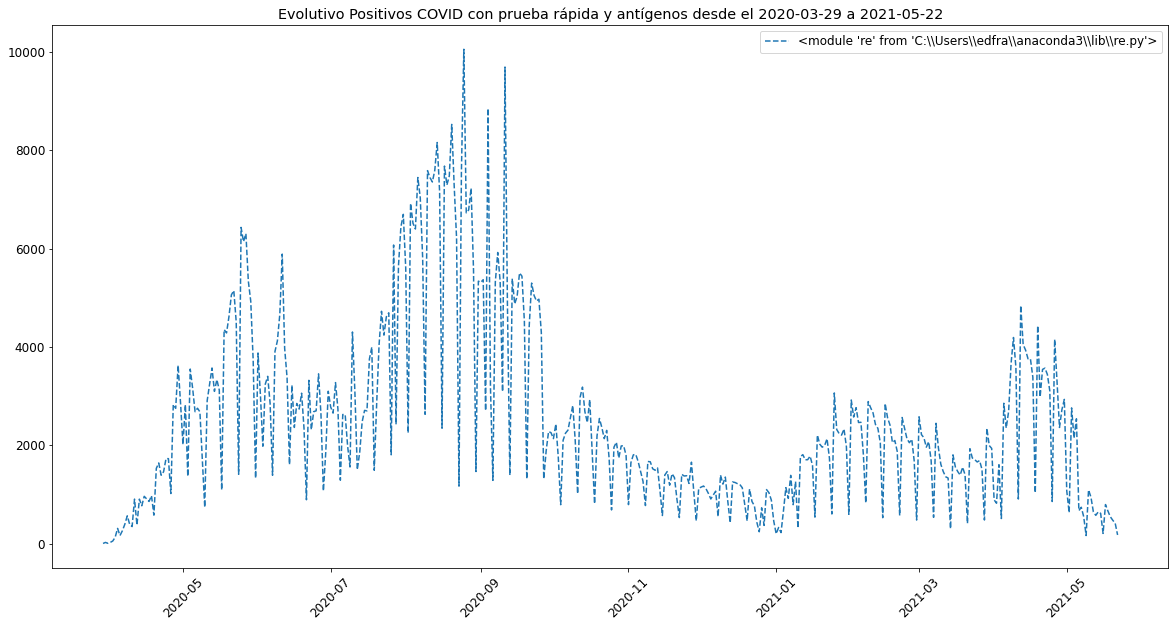

In [58]:
#Customiza el tamaño del frame d
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})
#Filtramos las fechas que son de nuestro interes
df_1 = df_pos4[df_pos4["FECHA"] >= "2020-03-29"]
x = df_1["FECHA"]
y = df_1["casos_totales"]    
ts = pd.Series(y.values, index=x.values)
plt.plot(x,y, label = re,linestyle='dashed')    

#Estilo de presentacion de legenda, etiquetas y titulos
plt.xticks(rotation=45)
plt.legend()
plt.title("Evolutivo Positivos COVID con prueba rápida y antígenos desde el 2020-03-29 a 2021-05-22")
plt.show()

3.2. Evolución de fallecidos.

In [59]:
df_fallecidos=pd.read_csv('fallecidos_sinadef.csv',encoding = 'latin1',delimiter = ';')

In [60]:
df_fallecidos.iloc[:,9:20].head()

,PROVINCIA DOMICILIO,DISTRITO DOMICILIO,FECHA,AÑO,MES,TIPO LUGAR,INSTITUCION,MUERTE VIOLENTA,NECROPSIA,DEBIDO A (CAUSA A),CAUSA A (CIE-X)
0,ASCOPE,PAIJAN,2021-01-19,2021,1,EESS,ESSALUD,SIN REGISTRO,NO SE REALIZÓ NECROPSIA,ASFIXIA DE NACIMIENTO SEVERA,P210
1,MARISCAL CACERES,JUANJUI,2020-01-17,2020,1,EESS,GOBIERNO REGIONAL,SIN REGISTRO,NO SE REALIZÓ NECROPSIA,INSUFICIENCIA RESPIRATORIA AGUDA,J960
2,CALLAO,CALLAO,2021-01-30,2021,1,VIA PUBLICA,SIN REGISTRO,NO SE CONOCE,SI SE REALIZÓ NECROPSIA,TRAUMATISMOS MULTIPLES,SIN REGISTRO
3,LAMAS,TABALOSOS,2020-01-03,2020,1,DOMICILIO,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA,INFARTO AGUDO DEL MIOCARDIO SIN OTRA ESPECIFIC...,I219
4,OYON,OYON,2021-01-10,2021,1,VIA PUBLICA,SIN REGISTRO,SIN REGISTRO,NO SE REALIZÓ NECROPSIA,INFARTO AGUDO DEL MIOCARDIO SIN OTRA ESPECIFIC...,I219


In [61]:
df_fallecidos.dtypes

TIPO SEGURO               object
SEXO                      object
EDAD                      object
TIEMPO EDAD               object
ESTADO CIVIL              object
NIVEL DE INSTRUCCIÓN      object
COD# UBIGEO DOMICILIO     object
PAIS DOMICILIO            object
DEPARTAMENTO DOMICILIO    object
PROVINCIA DOMICILIO       object
DISTRITO DOMICILIO        object
FECHA                     object
AÑO                        int64
MES                        int64
TIPO LUGAR                object
INSTITUCION               object
MUERTE VIOLENTA           object
NECROPSIA                 object
DEBIDO A (CAUSA A)        object
CAUSA A (CIE-X)           object
DEBIDO A (CAUSA B)        object
CAUSA B (CIE-X)           object
DEBIDO A (CAUSA C)        object
CAUSA C (CIE-X)           object
DEBIDO A (CAUSA D)        object
CAUSA D (CIE-X)           object
DEBIDO A (CAUSA E)        object
CAUSA E (CIE-X)           object
DEBIDO A (CAUSA F)        object
CAUSA F (CIE-X)           object
dtype: obj

In [62]:
from datetime import datetime

In [63]:
#df_fallecidos["FECHA"] = df_fallecidos["FECHA"].astype(int).astype(str)
df_fallecidos["FECHA"] =  pd.to_datetime( df_fallecidos["FECHA"],
                                         format= '%Y-%m-%d', errors = "coerce")

In [64]:
df_fallecidos1 = pd.get_dummies(df_fallecidos, columns = ["SEXO"])
df_fallecidos1 = df_fallecidos1.groupby(['FECHA']).agg({
     'SEXO_FEMENINO':['sum'],
     'SEXO_MASCULINO' : ['sum']} )
df_fallecidos1.columns = ["femenino","masculino"]
df_fallecidos1.reset_index(inplace=True)
df_fallecidos1["casos_totales"] = df_fallecidos1["femenino"] + df_fallecidos1["masculino"]

In [65]:
df_fallecidos1.tail()

,FECHA,femenino,masculino,casos_totales
1607,2021-05-27,330.0,454.0,784.0
1608,2021-05-28,327.0,423.0,750.0
1609,2021-05-29,312.0,405.0,717.0
1610,2021-05-30,276.0,420.0,696.0
1611,2021-05-31,161.0,198.0,359.0


In [66]:
df_fallecidos1.dtypes

FECHA            datetime64[ns]
femenino                float64
masculino               float64
casos_totales           float64
dtype: object

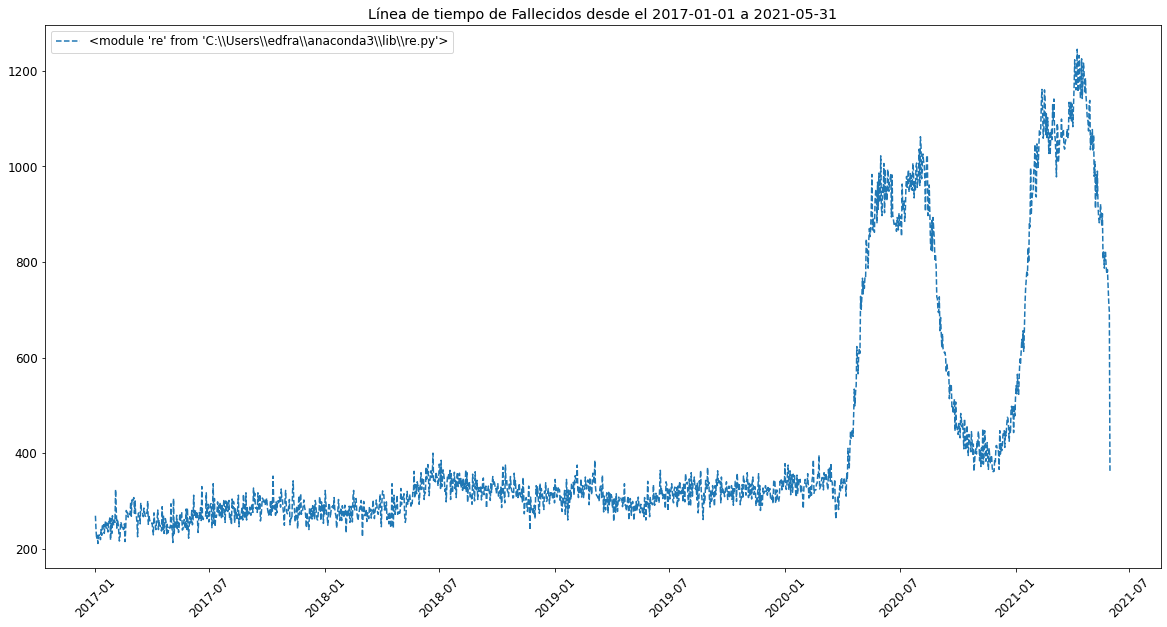

In [67]:
#Customiza el tamaño del frame d
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})
#Filtramos las fechas que son de nuestro interes
df_2 = df_fallecidos1[df_fallecidos1["FECHA"] >= "2017-01-01"]
x = df_2["FECHA"]
y = df_2["casos_totales"]    
ts = pd.Series(y.values, index=x.values)
plt.plot(x,y, label = re,linestyle='dashed')    

#Estilo de presentacion de legenda, etiquetas y titulos
plt.xticks(rotation=45)
plt.legend()
plt.title("Línea de tiempo de Fallecidos desde el 2017-01-01 a 2021-05-31")
plt.show()

3.3. Evolución de vacunados.

In [68]:
vacunas["FECHA_VACUNACION"] = vacunas["FECHA_VACUNACION"].astype(int).astype(str)
vacunas["FECHA"] =  pd.to_datetime( vacunas["FECHA_VACUNACION"],
                                         format= '%Y%m%d', errors = "coerce")

In [69]:
vacunas.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA
0,20210524,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA,2021-02-22
1,20210524,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA,2021-03-10
2,20210524,b17ceddbbde5df1c082e09dc076421fb,PERSONAL DE SALUD,NaN,MASCULINO,20210227,1,SINOPHARM,HUANUCO,HUANUCO,LEONCIO PRADO,RUPA-RUPA,2021-02-27
3,20210524,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS,2021-04-17
4,20210524,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA,2021-04-22


In [70]:
vacunas1 = pd.get_dummies(vacunas, columns = ["SEXO"])
vacunas1 = vacunas1.groupby(['FECHA']).agg({
     'SEXO_FEMENINO':['sum'],
     'SEXO_MASCULINO' : ['sum']} )
vacunas1.columns = ["femenino","masculino"]
vacunas1.reset_index(inplace=True)
vacunas1["casos_totales"] = vacunas1["femenino"] + vacunas1["masculino"]

In [71]:
vacunas1.tail()

,FECHA,femenino,masculino,casos_totales
100,2021-05-20,40313.0,37134.0,77447.0
101,2021-05-21,66531.0,60418.0,126949.0
102,2021-05-22,47254.0,42091.0,89345.0
103,2021-05-23,25051.0,21315.0,46366.0
104,2021-05-24,36355.0,32981.0,69336.0


In [72]:
vacunas1.dtypes

FECHA            datetime64[ns]
femenino                float64
masculino               float64
casos_totales           float64
dtype: object

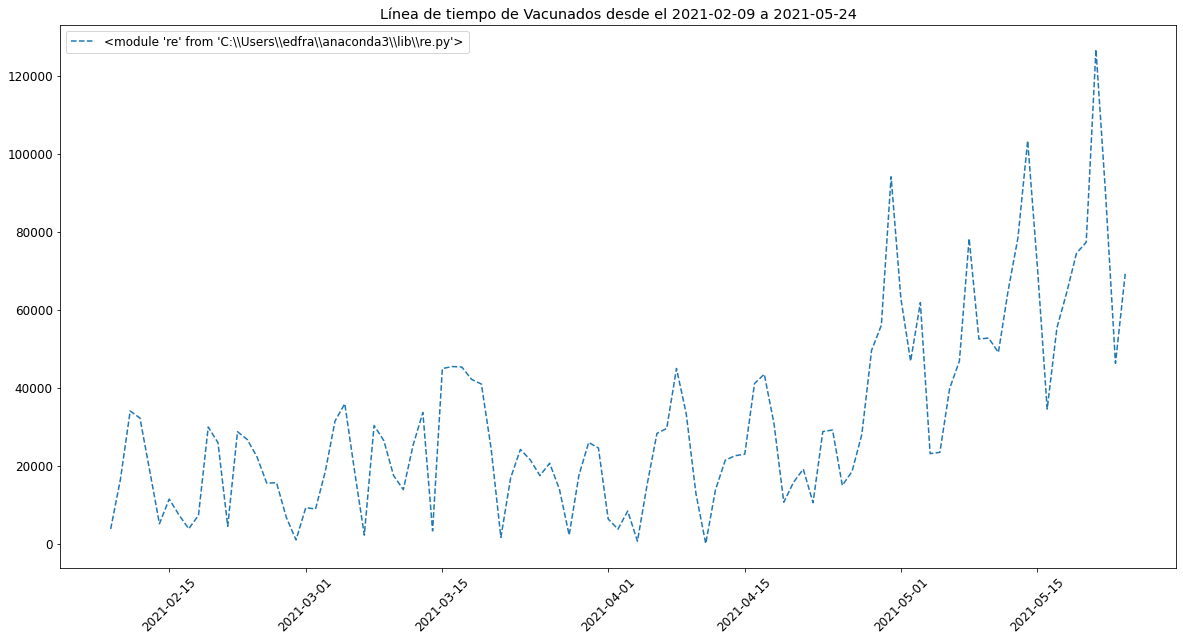

In [73]:
#Customiza el tamaño del frame
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})
#Filtramos las fechas que son de nuestro interes
df_3 = vacunas1[vacunas1["FECHA"] >= "2021-02-09"]
x = df_3["FECHA"]
y = df_3["casos_totales"]    
ts = pd.Series(y.values, index=x.values)
plt.plot(x,y, label = re,linestyle='dashed')    

#Estilo de presentacion de legenda, etiquetas y titulos
plt.xticks(rotation=45)
plt.legend()
plt.title("Línea de tiempo de Vacunados desde el 2021-02-09 a 2021-05-24")
plt.show()

3.4. Evolución de Infectados y fallecidos

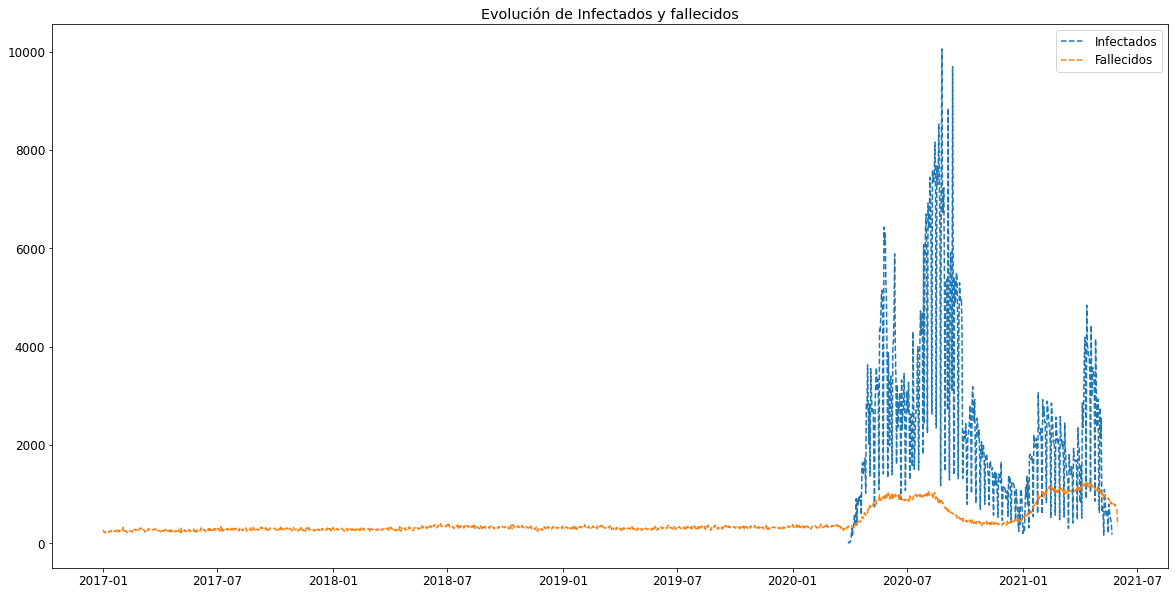

In [74]:
#Customiza el tamaño del frame
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})
#Filtramos las fechas que son de nuestro interes

df_4 = df_pos4[df_pos4["FECHA"] >= "2020-03-29"]
x1 = df_4["FECHA"]
y1 = df_4["casos_totales"]    

df_5 = df_fallecidos1[df_fallecidos1["FECHA"] >= "2017-01-01"]
x2 = df_5["FECHA"]
y2 = df_5["casos_totales"]   

plt.plot(x1,y1, label = "Infectados",linestyle='dashed')
plt.plot(x2,y2, label = "Fallecidos" ,linestyle='dashed')

plt.title("Evolución de Infectados y fallecidos")
plt.legend()
plt.show()

3.5. Evolución de infectados y vacunados.

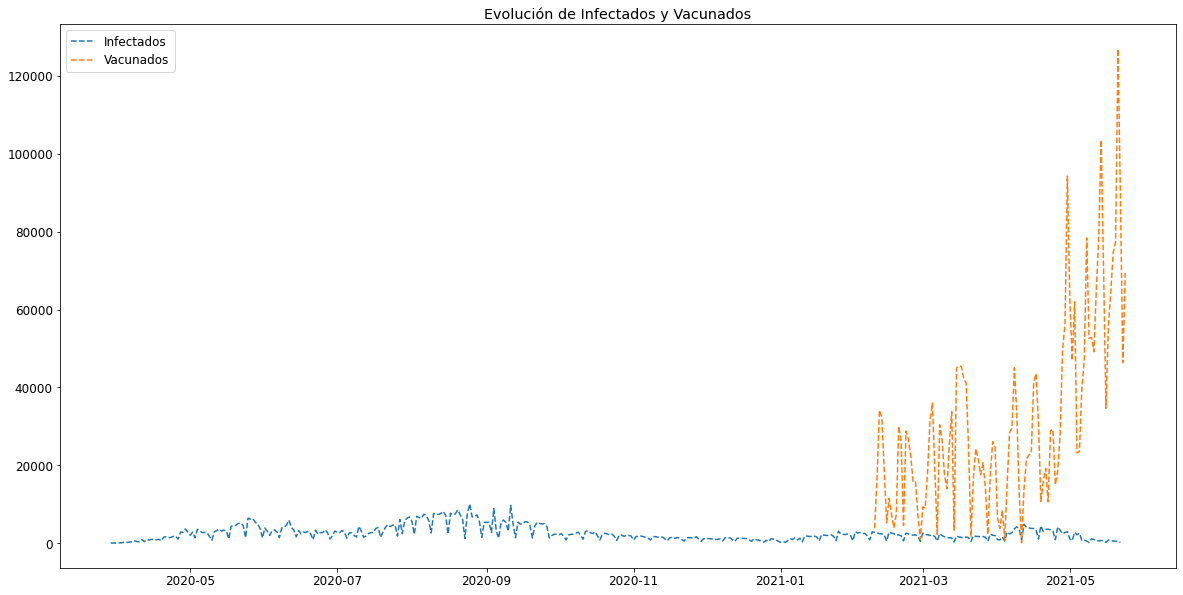

In [75]:
#Customiza el tamaño del frame
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})
#Filtramos las fechas que son de nuestro interes

df_6 = df_pos4[df_pos4["FECHA"] >= "2020-03-29"]
x3 = df_6["FECHA"]
y3 = df_6["casos_totales"]    
    

df_7 = vacunas1[vacunas1["FECHA"] >= "2021-02-09"]
x4 = df_7["FECHA"]
y4 = df_7["casos_totales"]    

plt.plot(x3,y3, label = "Infectados",linestyle='dashed')
plt.plot(x4,y4, label = "Vacunados" ,linestyle='dashed')

plt.title("Evolución de Infectados y Vacunados")
plt.legend()
plt.show()

3.6. Población vacunada con primera y segunda dosis, por tipo de fabricante a nivel distrital.

In [76]:
vacunas2 = pd.get_dummies(vacunas, columns = ["FABRICANTE","DOSIS"])
vacunas2 = vacunas2.groupby(['FECHA',"DOSIS_2"]).agg({
     'FABRICANTE_ASTRAZENECA':['sum'],
     'FABRICANTE_PFIZER' : ['sum'],
        'FABRICANTE_SINOPHARM' :['sum']} )
vacunas2.columns = ["ASTRAZENECA","PFIZER","SINOPHARM"]
vacunas2.reset_index(inplace=True)

In [77]:
vacunas2.head()

,FECHA,DOSIS_2,ASTRAZENECA,PFIZER,SINOPHARM
0,2021-02-09,0,0.0,0.0,3842.0
1,2021-02-10,0,0.0,0.0,16586.0
2,2021-02-11,0,0.0,0.0,34126.0
3,2021-02-12,0,0.0,0.0,32301.0
4,2021-02-13,0,0.0,0.0,18814.0


In [78]:
vacunas2=vacunas2[vacunas2.DOSIS_2 !=0]
vacunas2.head()

,FECHA,DOSIS_2,ASTRAZENECA,PFIZER,SINOPHARM
22,2021-03-02,1,0.0,0.0,2073.0
24,2021-03-03,1,0.0,0.0,12030.0
26,2021-03-04,1,0.0,0.0,27753.0
28,2021-03-05,1,0.0,0.0,31313.0
30,2021-03-06,1,0.0,0.0,15759.0


In [79]:
vacunas2.describe()

,DOSIS_2,ASTRAZENECA,PFIZER,SINOPHARM
count,84.0,84.000000,84.000000,84.000000
mean,1.0,6.261905,6689.940476,5215.273810
std,0.0,56.950225,9029.947607,7359.935082
min,1.0,0.000000,0.000000,1.000000
25%,1.0,0.000000,0.000000,594.250000
50%,1.0,0.000000,1837.000000,2009.500000
75%,1.0,0.000000,11996.000000,6418.500000
max,1.0,522.000000,38374.000000,31313.000000


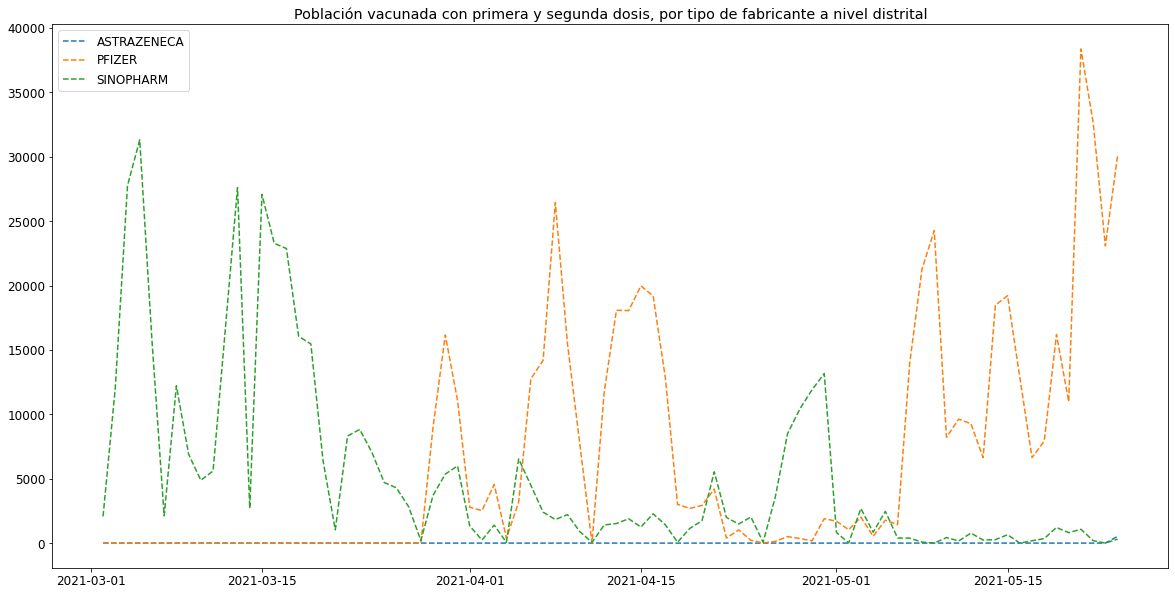

In [80]:
#Customiza el tamaño del frame
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})
#Filtramos las fechas que son de nuestro interes

df_8 = vacunas2[vacunas2["FECHA"] >= "2021-03-02"]
x5 = df_8["FECHA"]
y5 = df_8["ASTRAZENECA"]    
y6 = df_8["PFIZER"]
y7 = df_8["SINOPHARM"]
plt.plot(x5,y5, label = "ASTRAZENECA",linestyle='dashed')
plt.plot(x5,y6, label = "PFIZER",linestyle='dashed')
plt.plot(x5,y7, label = "SINOPHARM",linestyle='dashed')
plt.title("Población vacunada con primera y segunda dosis, por tipo de fabricante a nivel distrital")
plt.legend()
plt.show()

3.7. Gráfico de línea de tiempo que responda ¿Se podría concluir que la vacunación está disminuyendo la cantidad de fallecidos?.

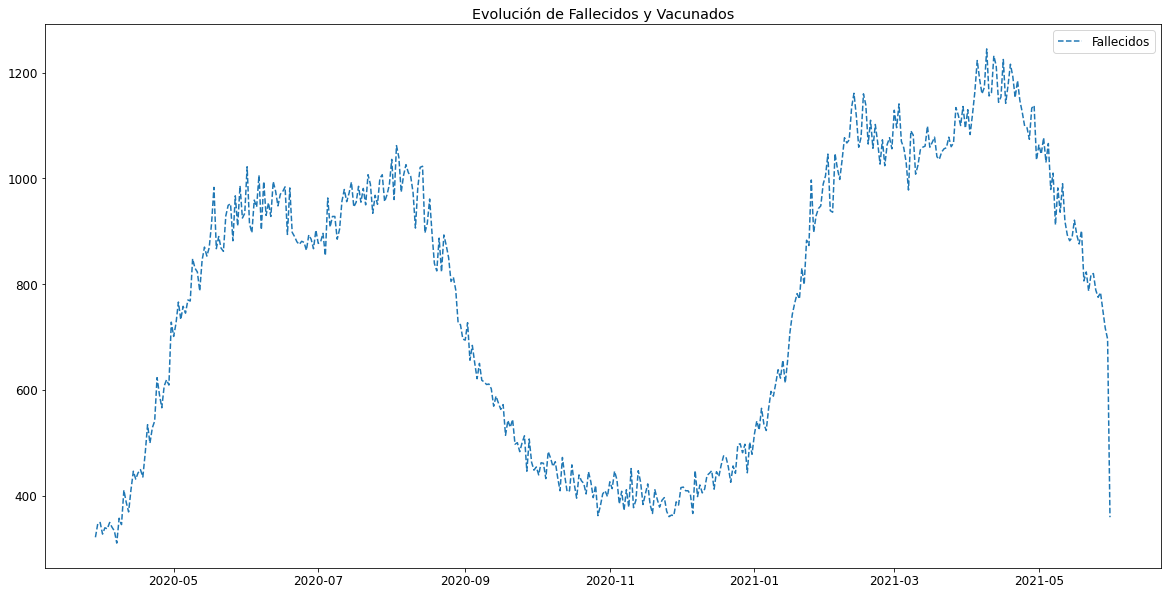

In [81]:
#Customiza el tamaño del frame
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})
#Filtramos las fechas que son de nuestro interes

#df_7 = vacunas1[vacunas1["FECHA"] >= "2021-02-09"]
#x4 = df_7["FECHA"]
#y4 = df_7["casos_totales"]    

df_9 = df_fallecidos1[df_fallecidos1["FECHA"] >= "2020-03-29"]
x8 = df_9["FECHA"]
y8 = df_9["casos_totales"]  

plt.plot(x8,y8, label = "Fallecidos",linestyle='dashed')

plt.title("Evolución de Fallecidos y Vacunados")
plt.legend()
plt.show()

Se puede ver que existieron marcadamente dos olas de la infección de la COVID19: la primera de ellas empezó aproximadamente en la segunda mitad de Abril del 2020, cuyos meses más calamitosos por la gran cantidad de fallecidos fue entre junio y agosto de ese mismo año. Luego, existió un período donde las casos y, en efecto, los fallecimientos a causa del virus bajaron y se mantuvieron en la baja: entre setiembre y fines de año. Ello gracias a la gran inmunidad de rebaño que desarrollamos muchos de nosotros. Sin embargo, debido a las diferentes mutaciones de la COVID19 -la variante inglesa y la brasileña- existió nuevamente una nueva ola de infección: comprendida entre enero y mediados de mayo de este año. Actualmente los casos y fallecimientos han bajado debido (y esto es discutible) a que no solo este período de reinfección ya haya tenido sus propias fluctuaciones y ahora tienda a la baja, sino también podríamos insertar la variable vacuna. Diríamos que este efecto vacuna tendría influencias pero con rezagos (efecto luego de varios meses de comenzada la vacunación).

### 4. Haga un mapa de calor indicando el porcentaje de vacunación que se ha realizado, a nivel distrital. En leyenda, el mapa debe mostrar el color más oscuro para la mayor vacunación y el más claro para la categoría menor.


In [82]:
vacunas4= pd.get_dummies(vacunas, columns = ['SEXO'])
vacunas4 = vacunas4.groupby(['DEPARTAMENTO','PROVINCIA','DISTRITO']).agg({
     'SEXO_FEMENINO':['sum'],
     'SEXO_MASCULINO' : ['sum']} )

vacunas4.columns = ["femenino","masculino"]
vacunas4.reset_index(inplace=True)
vacunas4["CASOS"] = vacunas4["femenino"] + vacunas4["masculino"]
vacunas4

,DEPARTAMENTO,PROVINCIA,DISTRITO,femenino,masculino,CASOS
0,AMAZONAS,BAGUA,ARAMANGO,266.0,241.0,507.0
1,AMAZONAS,BAGUA,BAGUA,1970.0,1768.0,3738.0
2,AMAZONAS,BAGUA,COPALLIN,119.0,117.0,236.0
3,AMAZONAS,BAGUA,EL PARCO,52.0,57.0,109.0
4,AMAZONAS,BAGUA,IMAZA,323.0,371.0,694.0
...,...,...,...,...,...,...
1662,UCAYALI,PADRE ABAD,CURIMANA,156.0,210.0,366.0
1663,UCAYALI,PADRE ABAD,IRAZOLA,237.0,270.0,507.0
1664,UCAYALI,PADRE ABAD,NESHUYA,194.0,214.0,408.0
1665,UCAYALI,PADRE ABAD,PADRE ABAD,838.0,836.0,1674.0


In [83]:
vacunas4 = vacunas4[["DEPARTAMENTO","PROVINCIA","DISTRITO","CASOS"]]
vacunas4

,DEPARTAMENTO,PROVINCIA,DISTRITO,CASOS
0,AMAZONAS,BAGUA,ARAMANGO,507.0
1,AMAZONAS,BAGUA,BAGUA,3738.0
2,AMAZONAS,BAGUA,COPALLIN,236.0
3,AMAZONAS,BAGUA,EL PARCO,109.0
4,AMAZONAS,BAGUA,IMAZA,694.0
...,...,...,...,...
1662,UCAYALI,PADRE ABAD,CURIMANA,366.0
1663,UCAYALI,PADRE ABAD,IRAZOLA,507.0
1664,UCAYALI,PADRE ABAD,NESHUYA,408.0
1665,UCAYALI,PADRE ABAD,PADRE ABAD,1674.0


In [84]:
vacunas4["CASOS"] = vacunas4["CASOS"].astype(int)

<ipython-input-84-eb688d0c7f2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacunas4["CASOS"] = vacunas4["CASOS"].astype(int)


In [85]:
vacunas4.head(20)

,DEPARTAMENTO,PROVINCIA,DISTRITO,CASOS
0,AMAZONAS,BAGUA,ARAMANGO,507
1,AMAZONAS,BAGUA,BAGUA,3738
2,AMAZONAS,BAGUA,COPALLIN,236
3,AMAZONAS,BAGUA,EL PARCO,109
4,AMAZONAS,BAGUA,IMAZA,694
5,AMAZONAS,BAGUA,LA PECA,369
6,AMAZONAS,BONGARA,CHISQUILLA,30
7,AMAZONAS,BONGARA,CHURUJA,64
8,AMAZONAS,BONGARA,COROSHA,40
9,AMAZONAS,BONGARA,CUISPES,39


In [86]:
vacunas4.shape

(1667, 4)

In [87]:
poblacion.tail()

,Código,Código.1,POBLACION,Departamento,Provincia,Distrito,Edad 0,Edad 1 año,Edad 2 años,Edad 3 años,...,Edad 106 años,Edad 107 años,Edad 108 años,Edad 109 años,Edad 110 años,Edad 111 años,Edad 112 años,Edad 113 años,Edad 114 años,Edad 115 años
1869,250302,250302,10214,Ucayali,Padre Abad,Irazola,232.0,206.0,228.0,232.0,...,0,0,0,0,0,0,0,0,0,0
1870,250303,250303,7722,Ucayali,Padre Abad,Curimana,167.0,187.0,200.0,181.0,...,0,0,0,0,0,0,0,0,0,0
1871,250304,250304,7594,Ucayali,Padre Abad,Neshuya,178.0,177.0,173.0,207.0,...,0,0,0,0,0,0,0,0,0,0
1872,250305,250305,5137,Ucayali,Padre Abad,Alexander Von Humboldt,105.0,103.0,110.0,124.0,...,0,0,0,0,0,0,0,0,0,0
1873,250401,250401,2860,Ucayali,Purus,Purus,47.0,62.0,87.0,78.0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
poblacion=poblacion.rename(columns={"Código": "CCODI_UBIGEO"})
poblacion=poblacion.rename(columns={"Departamento ": "DEPARTAMENTO"})
poblacion=poblacion.rename(columns={"Provincia": "PROVINCIA"})
poblacion=poblacion.rename(columns={"Distrito": "DISTRITO"})
poblacion.head()

,CCODI_UBIGEO,Código.1,POBLACION,DEPARTAMENTO,PROVINCIA,DISTRITO,Edad 0,Edad 1 año,Edad 2 años,Edad 3 años,...,Edad 106 años,Edad 107 años,Edad 108 años,Edad 109 años,Edad 110 años,Edad 111 años,Edad 112 años,Edad 113 años,Edad 114 años,Edad 115 años
0,10101,10101,32589,Amazonas,Chachapoyas,Chachapoyas,528.0,510.0,515.0,517.0,...,1,0,0,0,0,0,0,0,0,0
1,10102,10102,262,Amazonas,Chachapoyas,Asuncion,6.0,3.0,3.0,4.0,...,0,0,0,0,0,0,0,0,0,0
2,10103,10103,1136,Amazonas,Chachapoyas,Balsas,21.0,25.0,24.0,21.0,...,0,0,0,0,0,0,0,0,0,0
3,10104,10104,642,Amazonas,Chachapoyas,Cheto,13.0,9.0,8.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4,10105,10105,585,Amazonas,Chachapoyas,Chiliquin,8.0,8.0,12.0,11.0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
poblacion=poblacion[["CCODI_UBIGEO","POBLACION","DEPARTAMENTO","PROVINCIA","DISTRITO"]]
poblacion

,CCODI_UBIGEO,POBLACION,DEPARTAMENTO,PROVINCIA,DISTRITO
0,10101,32589,Amazonas,Chachapoyas,Chachapoyas
1,10102,262,Amazonas,Chachapoyas,Asuncion
2,10103,1136,Amazonas,Chachapoyas,Balsas
3,10104,642,Amazonas,Chachapoyas,Cheto
4,10105,585,Amazonas,Chachapoyas,Chiliquin
...,...,...,...,...,...
1869,250302,10214,Ucayali,Padre Abad,Irazola
1870,250303,7722,Ucayali,Padre Abad,Curimana
1871,250304,7594,Ucayali,Padre Abad,Neshuya
1872,250305,5137,Ucayali,Padre Abad,Alexander Von Humboldt


In [90]:
poblacion["DEPARTAMENTO"] = poblacion["DEPARTAMENTO"].str.upper()
poblacion["PROVINCIA"] = poblacion["PROVINCIA"].str.upper()
poblacion["DISTRITO"] = poblacion["DISTRITO"].str.upper()

In [91]:
poblacion.head(50)

,CCODI_UBIGEO,POBLACION,DEPARTAMENTO,PROVINCIA,DISTRITO
0,10101,32589,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS
1,10102,262,AMAZONAS,CHACHAPOYAS,ASUNCION
2,10103,1136,AMAZONAS,CHACHAPOYAS,BALSAS
3,10104,642,AMAZONAS,CHACHAPOYAS,CHETO
4,10105,585,AMAZONAS,CHACHAPOYAS,CHILIQUIN
5,10106,1781,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA
6,10107,480,AMAZONAS,CHACHAPOYAS,GRANADA
7,10108,1258,AMAZONAS,CHACHAPOYAS,HUANCAS
8,10109,3978,AMAZONAS,CHACHAPOYAS,LA JALCA
9,10110,3620,AMAZONAS,CHACHAPOYAS,LEIMEBAMBA


In [92]:
poblacion3 = pd.merge(poblacion, vacunas4,how="left")#, left_on=["DEPARTAMENTO","PROVINCIA","DISTRITO"], right_on = ["DEPARTAMENTO","PROVINCIA","DISTRITO"])
poblacion3.head()

,CCODI_UBIGEO,POBLACION,DEPARTAMENTO,PROVINCIA,DISTRITO,CASOS
0,10101,32589,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,8240.0
1,10102,262,AMAZONAS,CHACHAPOYAS,ASUNCION,44.0
2,10103,1136,AMAZONAS,CHACHAPOYAS,BALSAS,61.0
3,10104,642,AMAZONAS,CHACHAPOYAS,CHETO,46.0
4,10105,585,AMAZONAS,CHACHAPOYAS,CHILIQUIN,68.0


In [93]:
poblacion3.dtypes

CCODI_UBIGEO      int64
POBLACION         int64
DEPARTAMENTO     object
PROVINCIA        object
DISTRITO         object
CASOS           float64
dtype: object

In [94]:
poblacion3["POBLACION"] = poblacion3["POBLACION"].astype(float)

In [95]:
poblacion3["PROPORCION"]= poblacion3["CASOS"]  /  poblacion3["POBLACION"]

In [96]:
poblacion3

,CCODI_UBIGEO,POBLACION,DEPARTAMENTO,PROVINCIA,DISTRITO,CASOS,PROPORCION
0,10101,32589.0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,8240.0,0.252846
1,10102,262.0,AMAZONAS,CHACHAPOYAS,ASUNCION,44.0,0.167939
2,10103,1136.0,AMAZONAS,CHACHAPOYAS,BALSAS,61.0,0.053697
3,10104,642.0,AMAZONAS,CHACHAPOYAS,CHETO,46.0,0.071651
4,10105,585.0,AMAZONAS,CHACHAPOYAS,CHILIQUIN,68.0,0.116239
...,...,...,...,...,...,...,...
1869,250302,10214.0,UCAYALI,PADRE ABAD,IRAZOLA,507.0,0.049638
1870,250303,7722.0,UCAYALI,PADRE ABAD,CURIMANA,366.0,0.047397
1871,250304,7594.0,UCAYALI,PADRE ABAD,NESHUYA,408.0,0.053727
1872,250305,5137.0,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,NaN,NaN


In [97]:
poblacion3 = poblacion3.fillna(0)

In [98]:
poblacion3.head()

,CCODI_UBIGEO,POBLACION,DEPARTAMENTO,PROVINCIA,DISTRITO,CASOS,PROPORCION
0,10101,32589.0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,8240.0,0.252846
1,10102,262.0,AMAZONAS,CHACHAPOYAS,ASUNCION,44.0,0.167939
2,10103,1136.0,AMAZONAS,CHACHAPOYAS,BALSAS,61.0,0.053697
3,10104,642.0,AMAZONAS,CHACHAPOYAS,CHETO,46.0,0.071651
4,10105,585.0,AMAZONAS,CHACHAPOYAS,CHILIQUIN,68.0,0.116239


In [99]:
poblacion3["PORCENTAJES"] =poblacion3["PROPORCION"]*100
poblacion3["PORCENTAJES"] =poblacion3["PORCENTAJES"].astype(int)

In [100]:
poblacion3

,CCODI_UBIGEO,POBLACION,DEPARTAMENTO,PROVINCIA,DISTRITO,CASOS,PROPORCION,PORCENTAJES
0,10101,32589.0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,8240.0,0.252846,25
1,10102,262.0,AMAZONAS,CHACHAPOYAS,ASUNCION,44.0,0.167939,16
2,10103,1136.0,AMAZONAS,CHACHAPOYAS,BALSAS,61.0,0.053697,5
3,10104,642.0,AMAZONAS,CHACHAPOYAS,CHETO,46.0,0.071651,7
4,10105,585.0,AMAZONAS,CHACHAPOYAS,CHILIQUIN,68.0,0.116239,11
...,...,...,...,...,...,...,...,...
1869,250302,10214.0,UCAYALI,PADRE ABAD,IRAZOLA,507.0,0.049638,4
1870,250303,7722.0,UCAYALI,PADRE ABAD,CURIMANA,366.0,0.047397,4
1871,250304,7594.0,UCAYALI,PADRE ABAD,NESHUYA,408.0,0.053727,5
1872,250305,5137.0,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,0.0,0.000000,0


In [101]:
from dbfread import DBF
DATAMAP = DBF('C:\Python PUCP\PARCIAL\LIMITE_DISTRITAL_2020_INEI_geogpsperu_juansuyo_931381206.dbf', load=True,encoding='latin1')

In [102]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(5,20))

In [103]:
%matplotlib inline

In [104]:
shp_path ="C:\Python PUCP\PARCIAL\LIMITE_DISTRITAL_2020_INEI_geogpsperu_juansuyo_931381206.shp"
sf = shp.Reader(shp_path)

In [105]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (15,20)):
    '''
    Graficar el mapa con las coordenadas
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

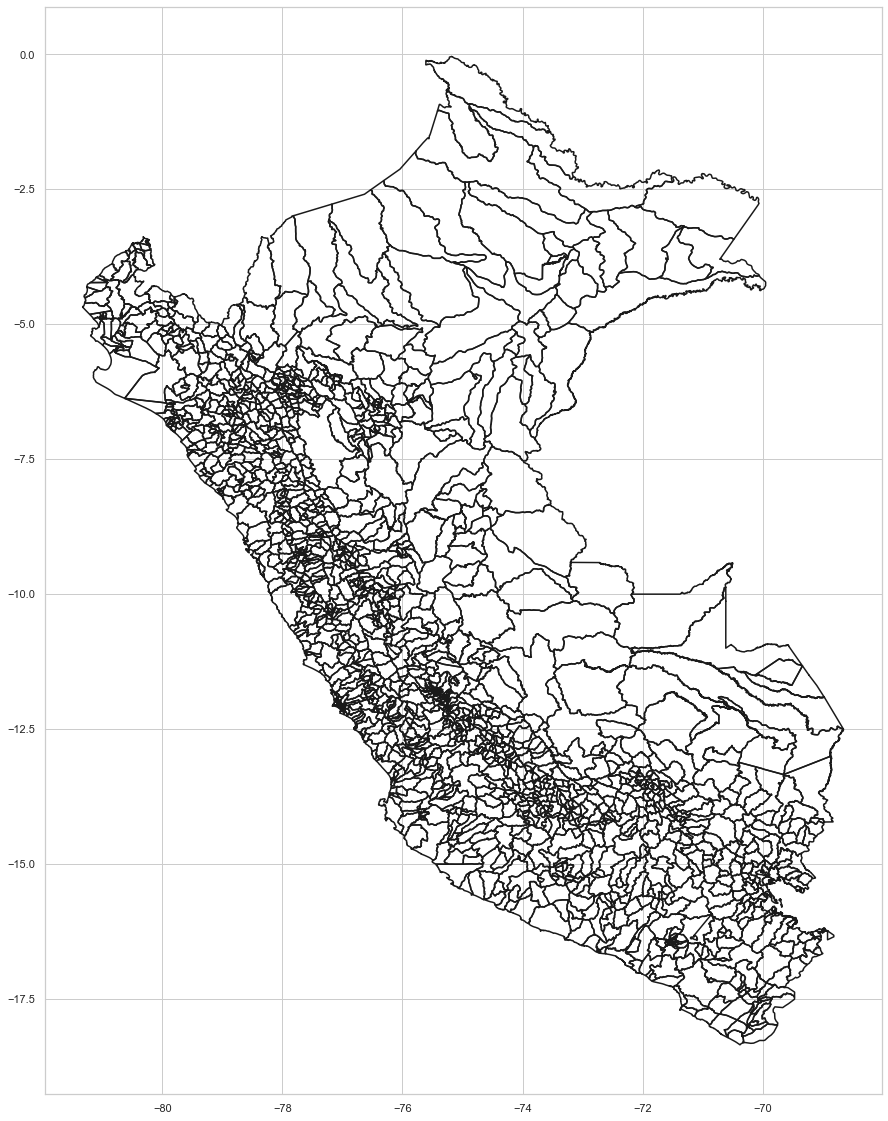

In [106]:
plot_map(sf)

In [107]:
def read_shapefile(sf):
    """
    Esta función nos permite leer un archivo Shape en un DataFrame de Pandas con 
    una columna de  "coordenadas"  manteniendo la geometría de la información. 
    Aquí se usa el paquete pyshp comentado al principio del código.  
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [108]:
DATASHAPE = read_shapefile(sf)
DATASHAPE.shape

(1874, 16)

In [109]:
DATASHAPE.sample(5)

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,coords
1495,14,LAMBAYEQUE,02,FERREÑAFE,01,FERREÑAFE,FERREÑAFE,140201,1402,140201,17,FERREÑAFE,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-79.81709561437106, -6.569926974949908), (-7..."
88,04,AREQUIPA,03,CARAVELI,02,ACARI,ACARI,040302,0403,040302,29,ACARI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-74.62824998444921, -15.124496483326027), (-..."
958,08,CUSCO,13,URUBAMBA,04,MACHUPICCHU,MACHUPICCHU,081304,0813,081304,38,MACHUPICCHU,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-72.54071098232595, -13.082734355605965), (-..."
537,10,HUANUCO,02,AMBO,05,HUACAR,HUACAR,100205,1002,100205,171,HUACAR,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-76.25557611094871, -10.09933785295948), (-7..."
1691,05,AYACUCHO,05,LA MAR,08,TAMBO,TAMBO,050508,0505,050508,71,TAMBO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-73.99072285767369, -12.837749356247741), (-..."


In [110]:
def plot_map_fill_multiples_ids(title, CODIGO, sf,x_lim = None,y_lim = None,figsize = (10,16),color = 'b'):
    '''
    Crear un submapa con capacidad de colorear los shapes
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    for id in CODIGO:
        shape_ex = sf.shape(id)
        DIST=sf.record(id)['NOMBDIST']
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, DIST, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [111]:
def calc_color(data, color=None):
        if color==1: color_sq=['#54278fF0','#9e9ac8F0','#dadaebFF']; colors = 'Purples';
        elif color == 2: color_sq=['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494'];colors='YlGnBu';
        elif color == 3: color_sq =['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525'];colors = 'Greys';
        elif color == 9: color_sq =['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq =['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404'];colors ='YlOrBr';
        new_data, bins = pd.qcut(data, 3, retbins=True, 
        labels=list(range(3)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=3)
            sns.palplot(colors, 0.6);
            for i in range(3):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       "% => "+str(int(bins[i+1])-1)+ "%", end =" ")
            print("\n\n   1   2   3")    
        return color_ton, bins;

In [112]:
def plot_map_fill_multiples_ids_tone(sf, title, ciudad,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    La función se redefine para poder tener un Heatmap o mapa de calor
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for id in ciudad:
        #print(id)
        shape_ex = sf.shape(id)
        DIST=sf.record(id)['NOMBDIST']

        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[ciudad.index(id)])
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        #plt.text(x0, y0, DIST, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)    

In [113]:
def plot_ciudades_data(sf, title, ciudades, data=None, 
                      color=None, print_id=False,figsize=(11,20)):
    '''
    Se dibuja el mapa con los distritos indicados
    '''
    
    color_ton, bins = calc_color(data, color)
    plot_map_fill_multiples_ids_tone(sf, title, ciudades, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = figsize);

In [114]:
DISTPERUidx=list(DATASHAPE.NOMBDIST.index)

In [115]:
color_pallete = 1


1: 0% => 0% 
2: 1% => 4% 
3: 5% => 312% 

   1   2   3


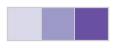

<Figure size 1080x1440 with 0 Axes>

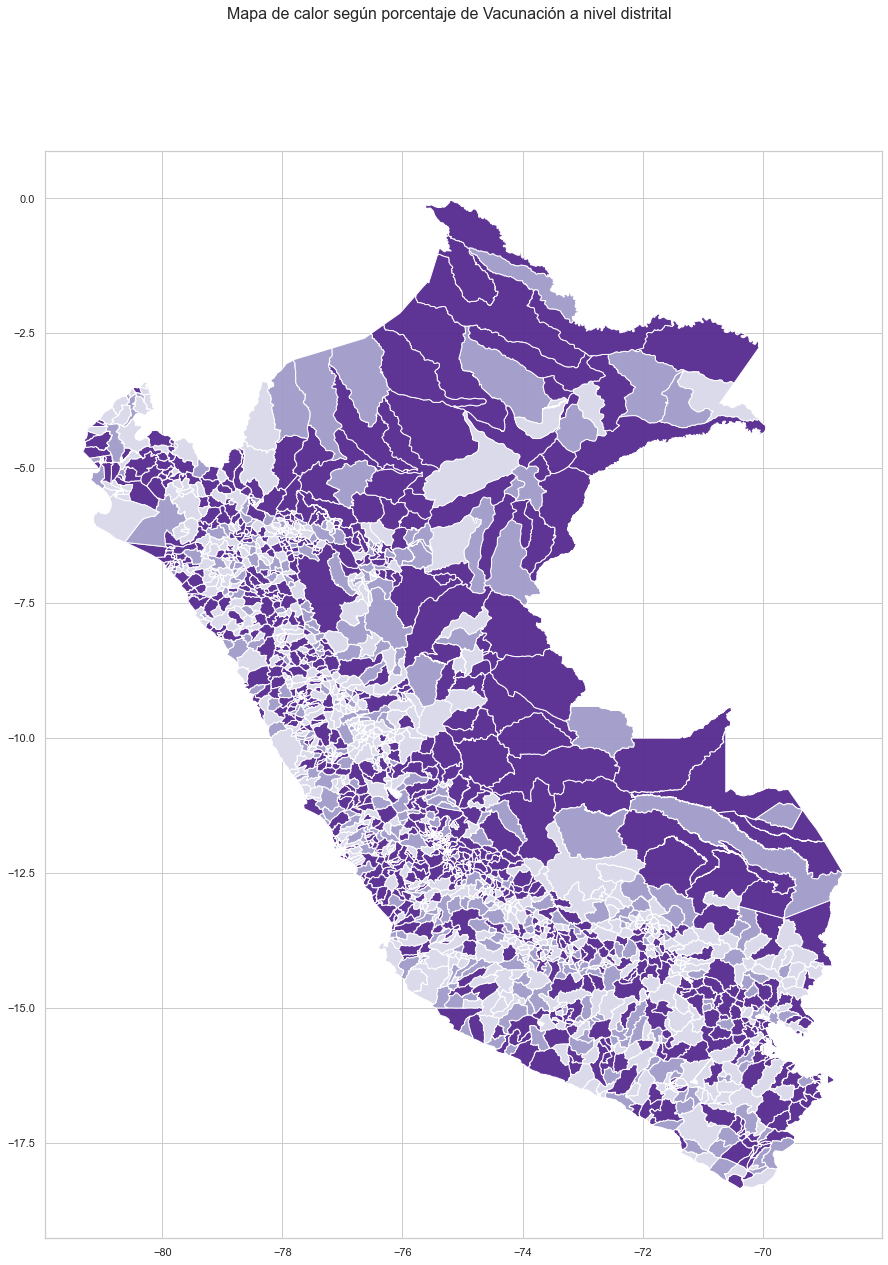

In [116]:
data=poblacion3.PORCENTAJES
plot_ciudades_data(sf,'Mapa de calor según porcentaje de Vacunación a nivel distrital', DISTPERUidx, data=data,color=color_pallete, print_id=False,figsize=(15,20))

NOTA: No pude hacer mapa de calor más extenso, porque los porcentajes varían entre 0 y 20 %; sin embargo, existieron unos distritos cuyo porcentaje de vacunados sobrepasaba el 100% puesto que imagino viajaban de otros distritos para vacunarse en Lima. Esos porcentajes hicieron hacer mucho más disperso al hacer la discretizacion por cuantiles con la funcion "qcut". Por eso, es que los porcentajes salieron así de dispersos. 

### 5. Un periodista le pregunta, ¿Se podría con esta información o con la evolución de la misma, saber qué vacuna es mejor que otra?. Sea su respuesta positiva o negativa, explique.

In [117]:
vacunas8 = pd.get_dummies(vacunas, columns = ["FABRICANTE"])
vacunas8 = vacunas8.groupby(['FECHA']).agg({
     'FABRICANTE_ASTRAZENECA':['sum'],
     'FABRICANTE_PFIZER' : ['sum'],
        'FABRICANTE_SINOPHARM' :['sum']} )
vacunas8.columns = ["ASTRAZENECA","PFIZER","SINOPHARM"]
vacunas8.reset_index(inplace=True)

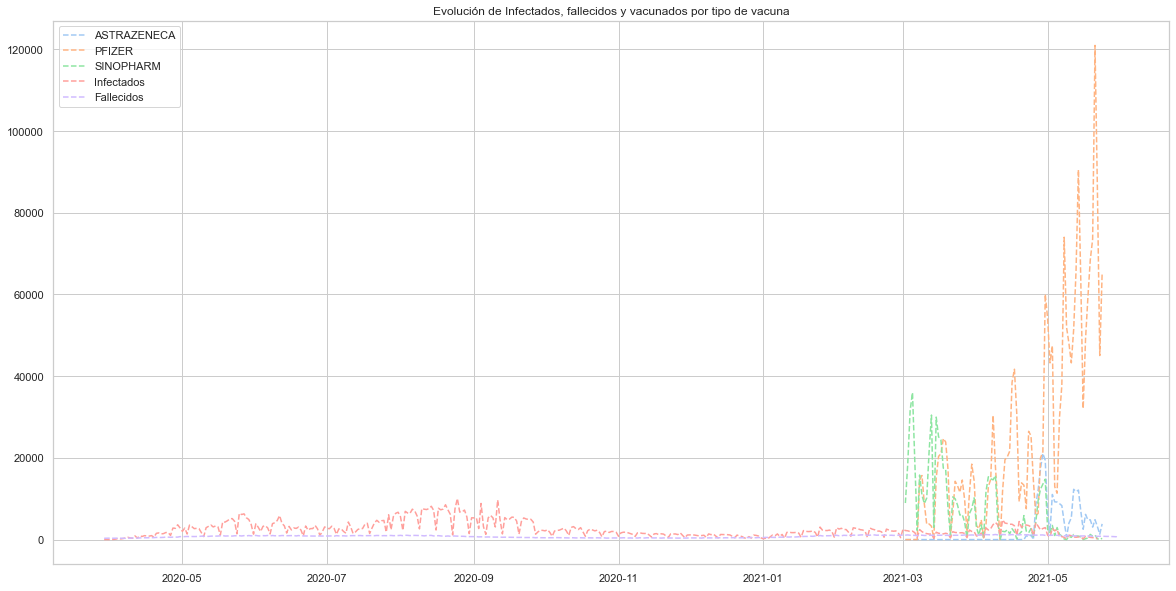

In [118]:
#Curva de vacunados por tipo de vacuna
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})
#Filtramos las fechas que son de nuestro interes

df_16 = vacunas8[vacunas8["FECHA"] >= "2021-03-02"]
x16 = df_16["FECHA"]
y16 = df_16["ASTRAZENECA"]    
y17 = df_16["PFIZER"]
y18 = df_16["SINOPHARM"]

plt.plot(x16,y16, label = "ASTRAZENECA",linestyle='dashed')
plt.plot(x16,y17, label = "PFIZER",linestyle='dashed')
plt.plot(x16,y18, label = "SINOPHARM",linestyle='dashed')

#Curva de positivos y fallecidos 

df_12 = df_fallecidos1[df_fallecidos1["FECHA"] >= "2020-03-29"]
x12 = df_12["FECHA"]
y12 = df_12["casos_totales"]   

plt.plot(x1,y1, label = "Infectados",linestyle='dashed')
plt.plot(x12,y12, label = "Fallecidos" ,linestyle='dashed')

plt.title("Evolución de Infectados, fallecidos y vacunados por tipo de vacuna")
plt.legend()
plt.show()

Como se pueden ver en los gráficos anteriores -este último no tanto puesto que las líneas pueden ser un poco confusas- se muestran que desde que se adquirieron el primer lote de vacunas Sinopharm (febrero), estas fueron las únicas en inocularse hasta la llegada de Astrazeneca en abril y Pfizer en esas misma fecha. Desde febrero, Sinopharm ha venido inoculando hasta 30 mil dosis por día programado; sin embargo, desde la llegada de Astrazeneca y Pfizer, pues estas inoculaciones  bajaron hasta la actualidad que aproximadamente oscila entre los cientos de inoculaciones por día programado. Ahora, Pfizer y Astrazeneca y en particular este primero -Pfizer- llegó para quedarse, puesto que desde su llegada no hace más que ser constante en sus altos números de inoculaciones en días programados, eso en diferencia con Astrazeneca y Sinopharm. Ello también porque las mismas autoridades saben de la mayor eficacia de la vacuna Pfizer. Con los datos proporcionados, se ve que desde este mes -mayo y junio- existen descensos tanto de fallecidos y positivos, definitivamente una de las variables a considerar es que las vacunaciones están surgiendo efecto (con un poco de rezago como ya lo expliqué anteriormente). No obstante, no podríamos decir que Pfizer -según los datos recogidos en la base de datos- sea la mejor de esas vacunas. Dicho descenso de fallecimientos y casos como dije se debe -en general- a la vacuna, en específico diría yo a que ya la gran cantidad de vacunados desde febrero refuerzan esa inmunidad de rebaño. 